In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm


%matplotlib inline

C:\Program Files\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [7]:
milk = pd.read_csv('monthly-milk-production.csv',';', index_col=['month'], parse_dates=['month'], dayfirst=True)

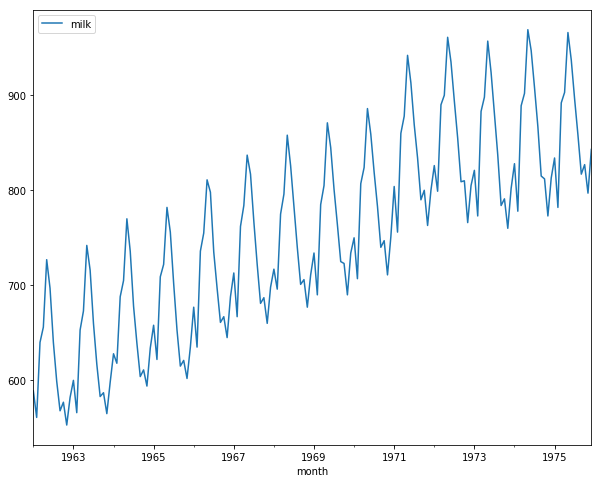

In [11]:
milk.plot(figsize=(10, 8));

In [17]:
sm.tsa.stattools.adfuller(milk.values.ravel())

(-1.3038115874221294,
 0.62742670860303162,
 13,
 154,
 {'1%': -3.4735425281962091,
  '10%': -2.5768780536346769,
  '5%': -2.880497674144038},
 1115.1730447395112)

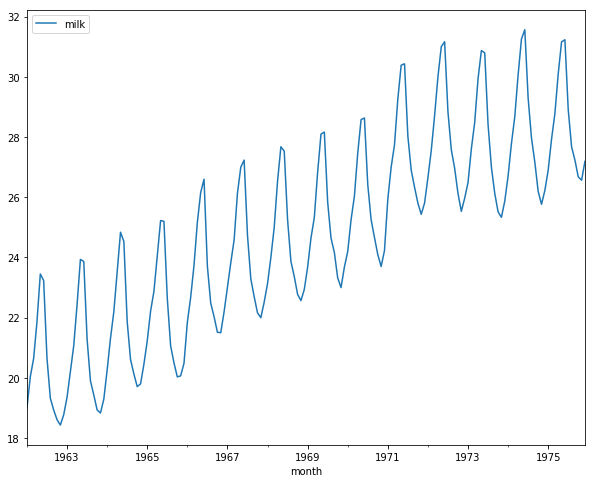

In [39]:
milk_per_month = pd.DataFrame(milk.values.ravel() / milk.index.daysinmonth.values, index=milk.index, columns=['milk'])
milk_per_month.plot(figsize=(10, 8))

In [40]:
milk_per_month.sum()

milk    4166.326662
dtype: float64

In [48]:
milk_daily_diff1 = milk_per_month - milk_per_month.shift(1)
milk_daily_diff12 = milk_per_month - milk_per_month.shift(12)
milk_daily_diff12_1 = milk_daily_diff12 - milk_daily_diff12.shift(1)

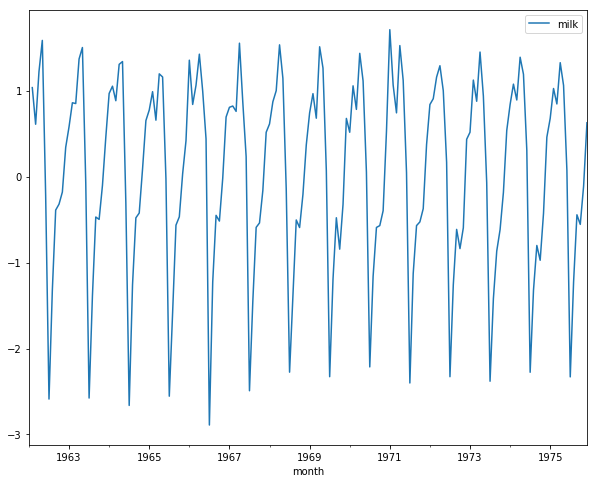

In [47]:
milk_daily_diff1.plot(figsize=(10, 8))

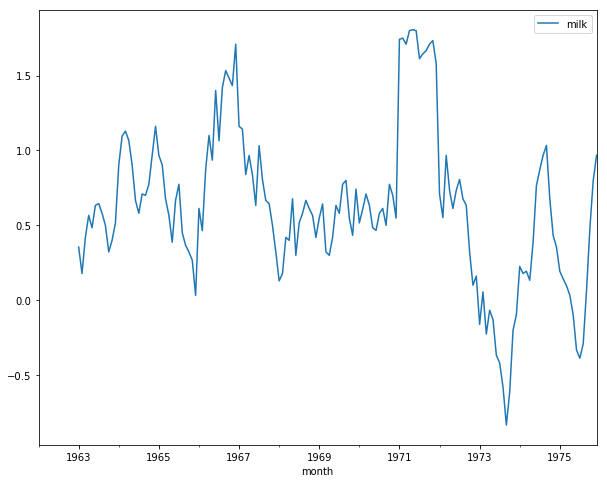

In [49]:
milk_daily_diff12.plot(figsize=(10, 8))

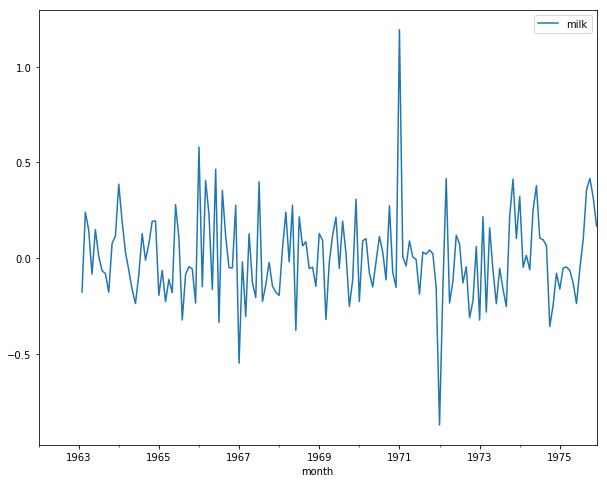

In [58]:
milk_daily_diff12_1.plot(figsize=(10, 8))

In [53]:
sm.tsa.stattools.adfuller(milk_daily_diff1.dropna().values.ravel())

(-2.7594694762288894,
 0.064300546541750256,
 11,
 155,
 {'1%': -3.4732590518613002,
  '10%': -2.5768120811654525,
  '5%': -2.8803740821053339},
 -1.1539973381055688)

In [54]:
sm.tsa.stattools.adfuller(milk_daily_diff12.dropna().values.ravel())

(-2.1594860932888089,
 0.22127672658830333,
 12,
 143,
 {'1%': -3.4769274060112707,
  '10%': -2.5776654080884152,
  '5%': -2.8819726324025625},
 -25.225679141303317)

In [59]:
sm.tsa.stattools.adfuller(milk_daily_diff12_1.dropna().values.ravel())

(-5.481326334796929,
 2.2808455518037136e-06,
 11,
 143,
 {'1%': -3.4769274060112707,
  '10%': -2.5776654080884152,
  '5%': -2.8819726324025625},
 -20.905137509892256)

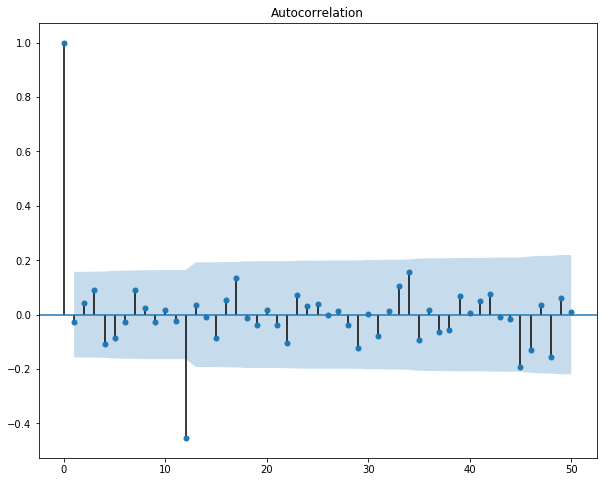

In [67]:
fig, ax = plt.subplots(figsize=(10, 8))
sm.graphics.tsa.plot_acf(milk_daily_diff12_1.dropna().values.squeeze(), lags=50, ax=ax);

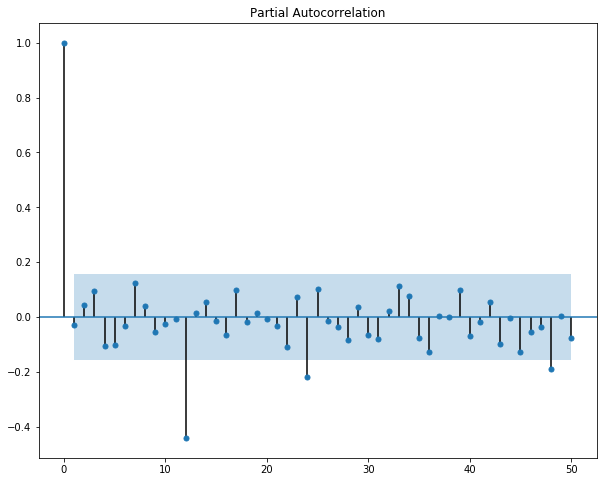

In [68]:
fig, ax = plt.subplots(figsize=(10, 8))
sm.graphics.tsa.plot_pacf(milk_daily_diff12_1.dropna().values.squeeze(), lags=50, ax=ax);